In [1]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2.16.2
Num GPUs Available:  1


In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0) * 1

per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [5]:
per_clf.predict([[2, 0.5]])

array([0])

In [6]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.16.2'

In [7]:
keras.__version__

'3.8.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape)
print(X_train_full.dtype)


(60000, 28, 28)
uint8


In [43]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

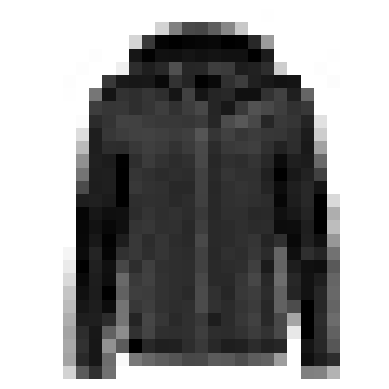

In [12]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))       # 입력층 28 * 28 이미지
model.add(keras.layers.Dense(300, activation='relu'))       # 은닉층 300개의 뉴런들을 이용하고 RELU 활성화 함수를 사용
model.add(keras.layers.Dense(100, activation='relu'))       # 은닉층 100개의 뉴런들을 이용하고 RELU 활성화 함수를 사용
model.add(keras.layers.Dense(10, activation='softmax'))     # 출력층 10개의 뉴런 사용, softmax 활성화 함수 사용

In [31]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.layers

[<Flatten name=flatten_4, built=True>,
 <Dense name=dense_12, built=True>,
 <Dense name=dense_13, built=True>,
 <Dense name=dense_14, built=True>]

In [33]:
model.layers[1].name

'dense_12'

In [34]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[ 0.01563622, -0.0303875 ,  0.0704439 , ..., -0.07168404,
        -0.07359806,  0.04510107],
       [-0.05966514,  0.01531541, -0.02255264, ..., -0.07158595,
        -0.03573379,  0.01208226],
       [-0.02084647, -0.05209549, -0.04880684, ...,  0.0590293 ,
         0.0050798 ,  0.02354471],
       ...,
       [ 0.02115062,  0.06486034, -0.01442508, ...,  0.00389574,
        -0.02963834, -0.03069005],
       [-0.03862372, -0.04620223, -0.04852972, ..., -0.00426789,
        -0.04869284,  0.05233659],
       [ 0.00327583,  0.0714547 , -0.05081578, ..., -0.04453433,
        -0.0025114 , -0.07431176]], dtype=float32)

In [44]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [37]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8154 - loss: 0.7005 - val_accuracy: 0.8182 - val_loss: 0.6850
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8073 - loss: 0.8500 - val_accuracy: 0.8166 - val_loss: 1.0275
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7971 - loss: 1.0402 - val_accuracy: 0.7542 - val_loss: 1.5084
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7854 - loss: 1.4915 - val_accuracy: 0.8014 - val_loss: 1.1689
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7749 - loss: 2.2559 - val_accuracy: 0.7756 - val_loss: 3.5372
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7597 - loss: 4.0854 - val_accuracy: 0.7650 - val_loss: 8.3317
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7318 - loss: 9.2410 - val_accuracy: 0.6406 - val_loss: 29.0865
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7154 - loss: 25.1455 

In [38]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [40]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

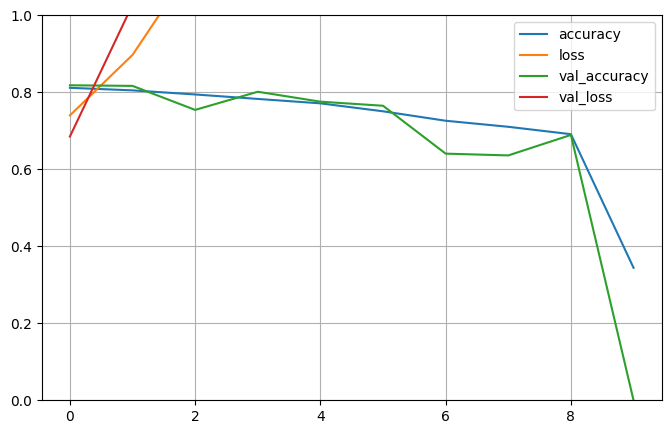

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: nan


[nan, 0.0]

In [49]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
 17/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0121  

/opt/anaconda3/envs/Machine_Learning-with-Scikit-Learn-Keras-TensorFlow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5661 - val_loss: 1.3065
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7581 - val_loss: 0.6038
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6502 - val_loss: 0.6718
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6236 - val_loss: 0.6347
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6058 - val_loss: 0.5782
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5927 - val_loss: 0.5882
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5828 - val_loss: 0.5550
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5754 - val_loss: 0.5792
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5702 - val_loss: 0.5147
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5668 - val_loss: 0.5636
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5636 - val_loss: 0.5114
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

In [53]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5426


0.5454739332199097

In [55]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.7579878],
       [1.7520294],
       [2.7373536]], dtype=float32)

In [57]:
import os

root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2025_03_01-16_30_48'

In [58]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [61]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4890

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.4856 - val_loss: 3.6938
Epoch 2/30
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7955

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7928 - val_loss: 2.0581
Epoch 3/30
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6586

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6575 - val_loss: 0.8072
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6094 - val_loss: 0.8735
Epoch 5/30
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6003

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5998 - val_loss: 0.5607
Epoch 6/30
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5816

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5810 - val_loss: 0.5165
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5747 - val_loss: 0.6819
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5689 - val_loss: 0.6326
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5663 - val_loss: 0.6300
Epoch 10/30
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5665

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5664 - val_loss: 0.5059
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5661 - val_loss: 0.5881
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5655 - val_loss: 0.6139
Epoch 13/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5659 - val_loss: 0.6047
Epoch 14/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5666 - val_loss: 1.0873
Epoch 15/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5700 - val_loss: 0.5399
Epoch 16/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5655 - val_loss: 0.5772
Epoch 17/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5669 - val_loss: 0.5918
Epoch 18/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5712 - val_loss: 1.3743
Epoch 19/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5713 - val_loss: 0.5175
Epoch 20/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5742 - val_loss: 2.1168
Epoch 21/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 